## Load libraries

In [11]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [12]:
def plot_history(H, epochs):
    # visualize performance
    plt.style.use("fivethirtyeight")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Load cifar10 data

In [13]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.
testX = testX.astype("float") / 255.

In [23]:
trainX.shape

(50000, 32, 32, 3)

In [24]:
# integers to one-hot vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

# initialize label names for CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", 
              "cat", "deer", "dog", "frog", "horse", 
              "ship", "truck"]

## ShallowNet 

ShallowNet architecture: </br>
>INPUT => CONV => ReLU => FC

In [25]:
# initialise model
model = Sequential()

# define CONV => RELU layer
model.add(Conv2D(32, (3, 3), 
                 padding="same", 
                 input_shape=(32, 32, 3)))
model.add(Activation("relu"))

# softmax classifier
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [26]:
opt = SGD(lr =.01)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

__Model summary__

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                327690    
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


__Plot model__

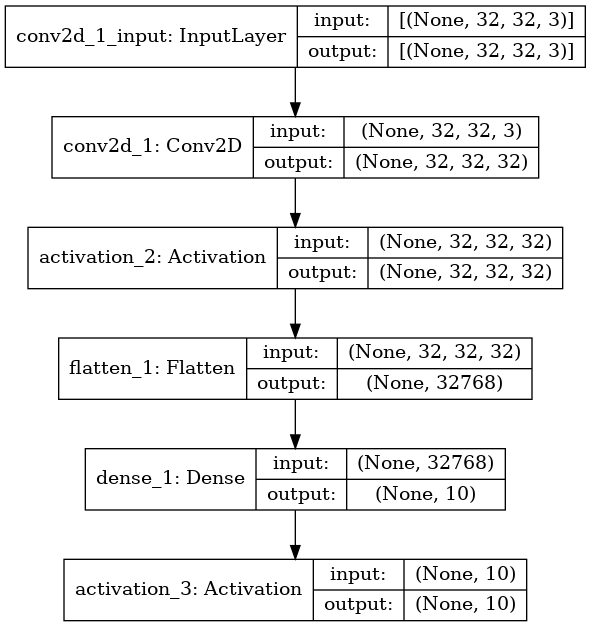

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [30]:
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), 
              batch_size=32,
              epochs=10,
              verbose=1)

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1482 - accuracy: 0.6007 - val_loss: 1.2916 - val_accuracy: 0.5403
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1236 - accuracy: 0.6101 - val_loss: 1.2373 - val_accuracy: 0.5671
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1002 - accuracy: 0.6186 - val_loss: 1.2539 - val_accuracy: 0.5591
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0784 - accuracy: 0.6260 - val_loss: 1.2293 - val_accuracy: 0.5673
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0624 - accuracy: 0.6338 - val_loss: 1.2463 - val_accuracy: 0.5657
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0408 - accuracy: 0.6390 - val_loss: 1.2270 - val_accuracy: 0.5719
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0270 - accuracy: 0.6461 - val_loss: 1.2150 -

__Evaluate model__

In [31]:
predictions = model.predict(testX, batch_size=32)

In [32]:
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.66      0.61      0.63      1000
  automobile       0.71      0.72      0.72      1000
        bird       0.36      0.59      0.45      1000
         cat       0.53      0.14      0.22      1000
        deer       0.59      0.30      0.39      1000
         dog       0.32      0.80      0.45      1000
        frog       0.76      0.48      0.59      1000
       horse       0.81      0.49      0.61      1000
        ship       0.69      0.71      0.70      1000
       truck       0.69      0.59      0.63      1000

    accuracy                           0.54     10000
   macro avg       0.61      0.54      0.54     10000
weighted avg       0.61      0.54      0.54     10000



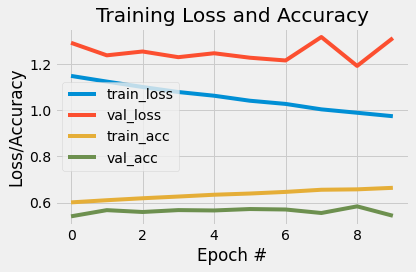

In [37]:
plot_history(H, 10)

## LeNet

LeNet architecture:
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

__Define model__

In [38]:
# define model
model = Sequential()

# first set of CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), 
                 padding="same", 
                 input_shape=(32, 32, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))

# second set of CONV => RELU => POOL
model.add(Conv2D(50, (5, 5), 
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [39]:
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

__Model summary__

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 50)        40050     
_________________________________________________________________
activation_5 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)             

__Plot model__

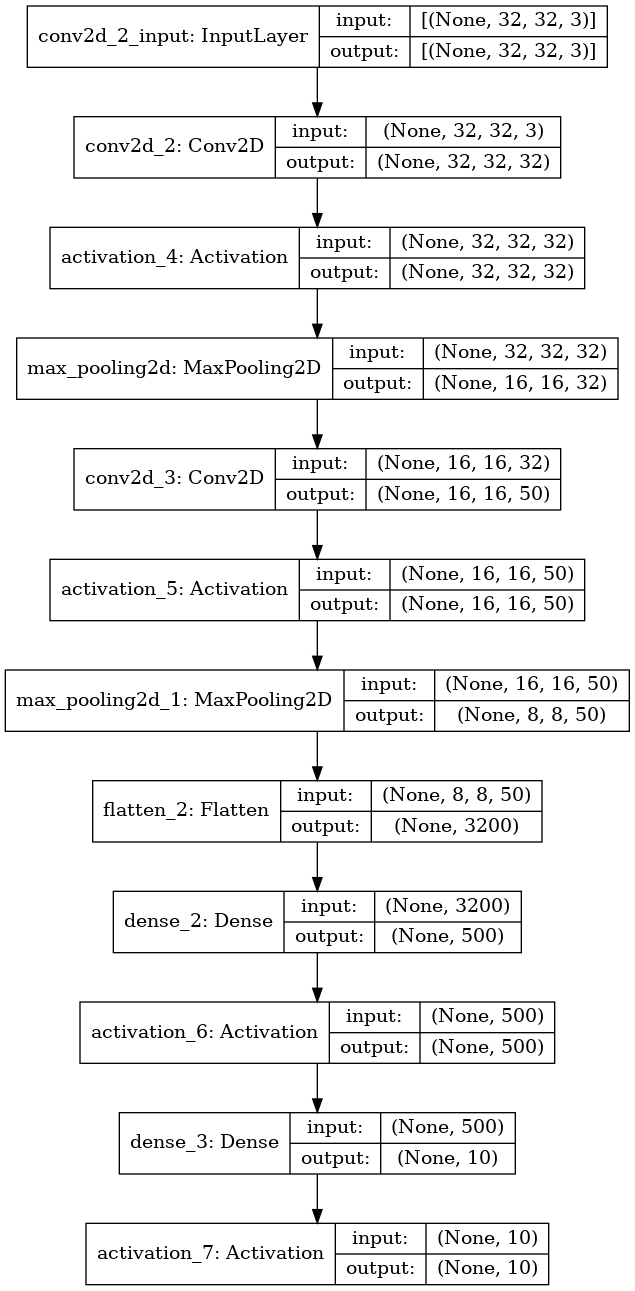

In [41]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [42]:
# train model
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), 
              batch_size=32,
              epochs=5,
              verbose=1)

Epoch 1/5
1563/1563 [==============================] - 225s 141ms/step - loss: 2.0601 - accuracy: 0.2542 - val_loss: 1.6151 - val_accuracy: 0.4238
Epoch 2/5
1563/1563 [==============================] - 221s 141ms/step - loss: 1.5614 - accuracy: 0.4435 - val_loss: 1.5154 - val_accuracy: 0.4525
Epoch 3/5
1563/1563 [==============================] - 206s 132ms/step - loss: 1.3761 - accuracy: 0.5134 - val_loss: 1.2974 - val_accuracy: 0.5427
Epoch 4/5
1563/1563 [==============================] - 172s 110ms/step - loss: 1.2646 - accuracy: 0.5543 - val_loss: 1.2269 - val_accuracy: 0.5638
Epoch 5/5
1563/1563 [==============================] - 157s 101ms/step - loss: 1.1756 - accuracy: 0.5854 - val_loss: 1.1640 - val_accuracy: 0.5904


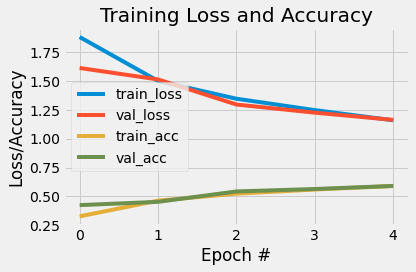

In [43]:
plot_history(H, 5)

In [44]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.62      0.69      0.65      1000
  automobile       0.62      0.81      0.70      1000
        bird       0.40      0.60      0.48      1000
         cat       0.48      0.38      0.42      1000
        deer       0.61      0.40      0.48      1000
         dog       0.51      0.50      0.51      1000
        frog       0.71      0.65      0.68      1000
       horse       0.80      0.51      0.63      1000
        ship       0.69      0.70      0.70      1000
       truck       0.62      0.64      0.63      1000

    accuracy                           0.59     10000
   macro avg       0.61      0.59      0.59     10000
weighted avg       0.61      0.59      0.59     10000

